# Image classification using LeNet-5


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

cuda:0


## Data Loader

In [4]:
classes = ('macular_degeneration', 'else') 
path_train = '/content/drive/MyDrive/tmp/Fundus/train/'
path_valid = '/content/drive/MyDrive/tmp/Fundus/valid/'
batch_size = 20

In [5]:
trainset = torchvision.datasets.ImageFolder(root = path_train,transform=transforms.Compose([transforms.Grayscale(num_output_channels=1),
                                                                                          transforms.Resize((128,128)),
                                                                                          transforms.ToTensor()]))
validset = torchvision.datasets.ImageFolder(root = path_valid,transform=transforms.Compose([transforms.Grayscale(num_output_channels=1),
                                                                                          transforms.Resize((128,128)),
                                                                                          transforms.ToTensor()]))
train_iter = torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)
valid_iter = torch.utils.data.DataLoader(validset,batch_size=batch_size,shuffle=True)

In [6]:
tgtnames = trainset.classes
tgtnames

['else', 'macular_degeneration']

torch.Size([20])
torch.Size([20, 1, 128, 128])


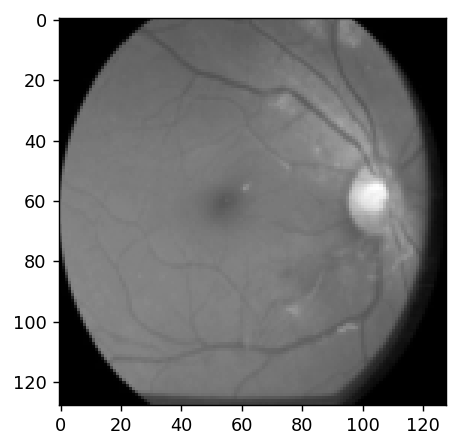

tensor(0)
else


In [7]:
dataiter=iter(train_iter)
images, labels = dataiter.next()
print(labels.shape)
print(images.shape)
I = images[0][0].numpy()
plt.figure(dpi=128)
plt.imshow(I,cmap='gray')
plt.show()
print(labels[0])
print(tgtnames[labels[0]])

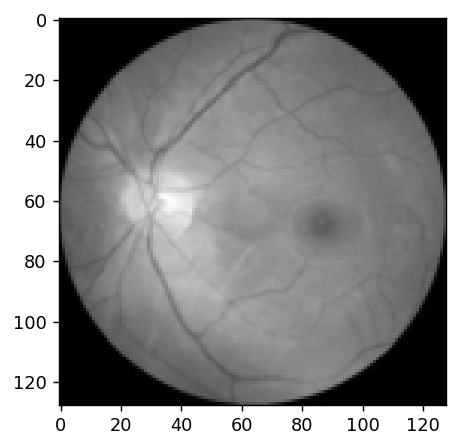

else


In [8]:
n=10
I = images[n][0].numpy()
plt.figure(dpi=128)
plt.imshow(I,cmap='gray')
plt.show()
print(tgtnames[labels[n]])

# Model (LeNet-5)

In [9]:
class Flatten(torch.nn.Module):
    def forward(self, x):
        return x.view(x.shape[0], -1)
    
net = torch.nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, padding=1),       
    nn.ReLU(),                                                                    
    nn.AvgPool2d(kernel_size=2, stride=2),                                       
    nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3, padding=1),        
    nn.ReLU(),                                                                    
    nn.AvgPool2d(kernel_size=2, stride=2),                                     
    Flatten(),  
    nn.Linear(in_features=16*32*32, out_features=1600),                         
    nn.ReLU(),
    nn.Linear(1600, 160),
    nn.ReLU(),
    nn.Linear(160, 2)
)
net = net.to(device)
net

Sequential(
  (0): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (3): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (6): Flatten()
  (7): Linear(in_features=16384, out_features=1600, bias=True)
  (8): ReLU()
  (9): Linear(in_features=1600, out_features=160, bias=True)
  (10): ReLU()
  (11): Linear(in_features=160, out_features=2, bias=True)
)

In [10]:
torch.nn.init.xavier_uniform_(net[0].weight)
torch.nn.init.xavier_uniform_(net[3].weight)
torch.nn.init.xavier_uniform_(net[7].weight)
torch.nn.init.xavier_uniform_(net[9].weight)
torch.nn.init.xavier_uniform_(net[11].weight)
net = net.to(device)
net

Sequential(
  (0): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (3): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): ReLU()
  (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (6): Flatten()
  (7): Linear(in_features=16384, out_features=1600, bias=True)
  (8): ReLU()
  (9): Linear(in_features=1600, out_features=160, bias=True)
  (10): ReLU()
  (11): Linear(in_features=160, out_features=2, bias=True)
)

## PyTorch Hub

- PyTorch에서는 resnet, densenet 등 유명한 network를 쉽게 불러와서 활용할 수 있습니다.
- Input은 color image를 기준으로 네트워크 모델이 구현이 되어 있으므로, 1채널 input(흑백영상)을 활용할 때에는 model에 대한 수정이 필요합니다. 여기에서는 input을 넣을 때에 1채널을 동일하게 반복하여 넣는 방식을 사용하였습니다.
- Output의 개수는 class의 개수에 맞게 수정해 주어야 합니다.
- 활용할 수 있는 model을 아래를 참고합니다.
- https://pytorch.org/hub/research-models

In [ ]:
#net = torch.hub.load('pytorch/vision:v0.6.0', 'resnet18', pretrained=True)
#print(net)

In [ ]:
#net.fc = nn.Linear(512,2,bias=True)
#net.to(device)
#print(net)

# Model Training

In [11]:
# setting hyper-parameters
learning_rate = 0.05
num_epochs = 200

# loss function and algorithm
loss = torch.nn.CrossEntropyLoss() # loss
alg = torch.optim.SGD(net.parameters(),lr=learning_rate) # sgd

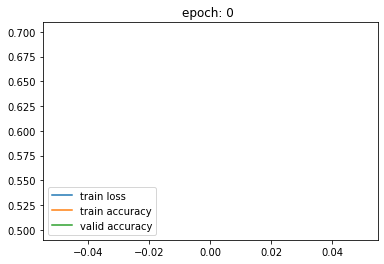

train loss:  0.6995228576660156
train accuracy:  0.5403226017951965
valid accuracy:  0.5


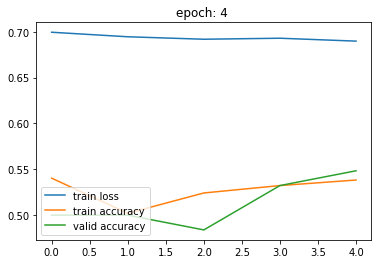

train loss:  0.6898252105712891
train accuracy:  0.538306474685669
valid accuracy:  0.5483871102333069


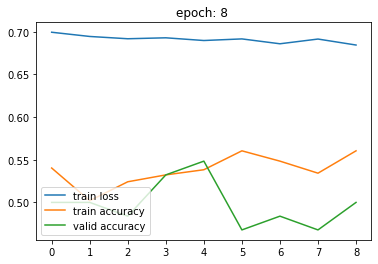

train loss:  0.6845285034179688
train accuracy:  0.5604838728904724
valid accuracy:  0.5


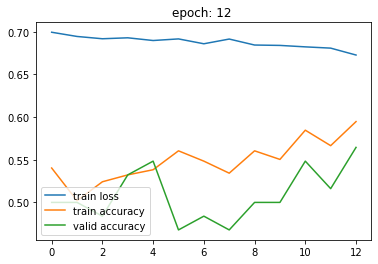

train loss:  0.6728001403808593
train accuracy:  0.5947580933570862
valid accuracy:  0.5645161271095276


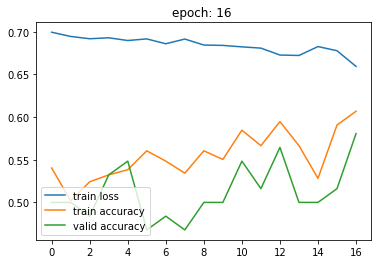

train loss:  0.6594847106933593
train accuracy:  0.6068548560142517
valid accuracy:  0.5806451439857483


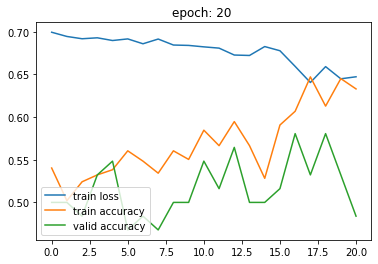

train loss:  0.647301025390625
train accuracy:  0.6330645084381104
valid accuracy:  0.4838709533214569


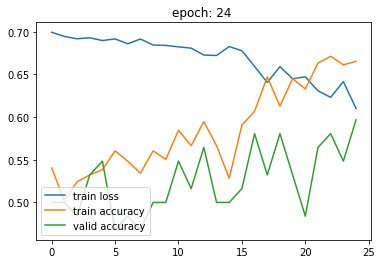

train loss:  0.6101500320434571
train accuracy:  0.6653226017951965
valid accuracy:  0.5967742204666138


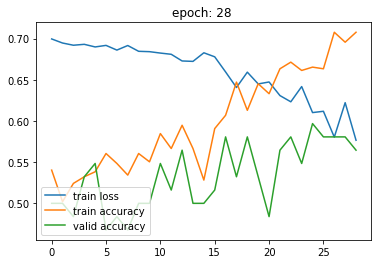

train loss:  0.5765753936767578
train accuracy:  0.7076612710952759
valid accuracy:  0.5645161271095276


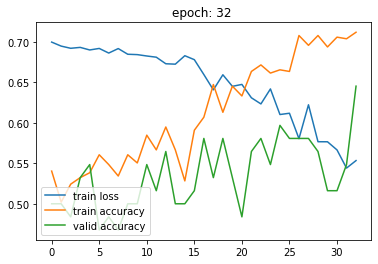

train loss:  0.5533219909667969
train accuracy:  0.711693525314331
valid accuracy:  0.6451612710952759


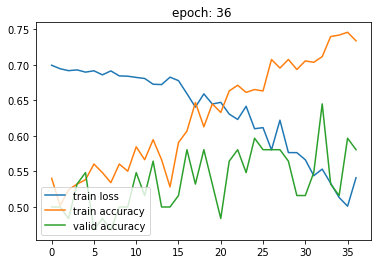

train loss:  0.541165428161621
train accuracy:  0.7338709831237793
valid accuracy:  0.5806451439857483


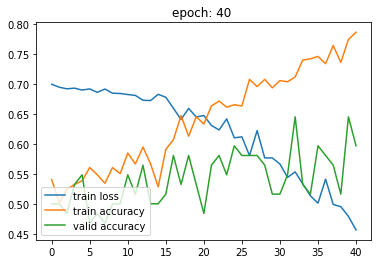

train loss:  0.45644439697265626
train accuracy:  0.7862903475761414
valid accuracy:  0.5967742204666138


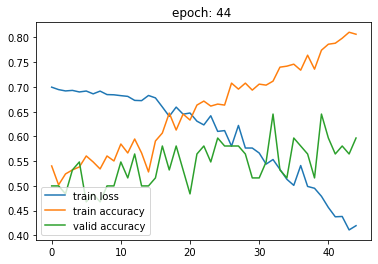

train loss:  0.4196451568603516
train accuracy:  0.8064516186714172
valid accuracy:  0.5967742204666138


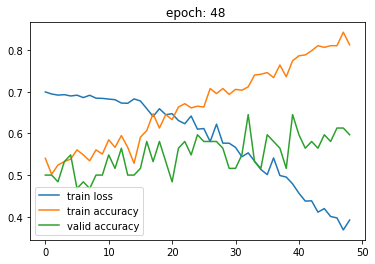

train loss:  0.39216472625732424
train accuracy:  0.8125
valid accuracy:  0.5967742204666138


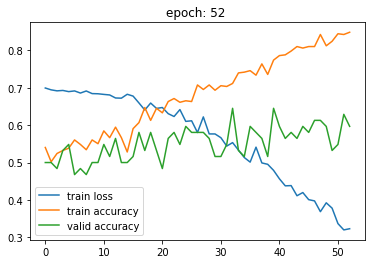

train loss:  0.3227944564819336
train accuracy:  0.8487903475761414
valid accuracy:  0.5967742204666138


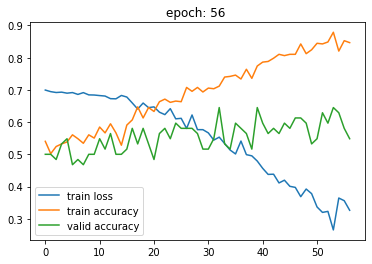

train loss:  0.3261834716796875
train accuracy:  0.8467742204666138
valid accuracy:  0.5483871102333069


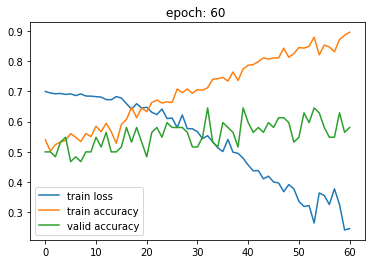

train loss:  0.2465250587463379
train accuracy:  0.8951612710952759
valid accuracy:  0.5806451439857483


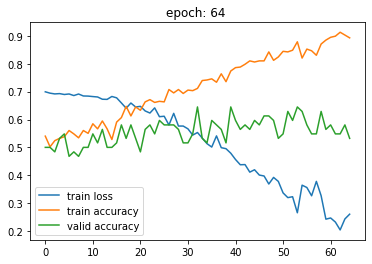

train loss:  0.26013372421264647
train accuracy:  0.8931451439857483
valid accuracy:  0.5322580933570862


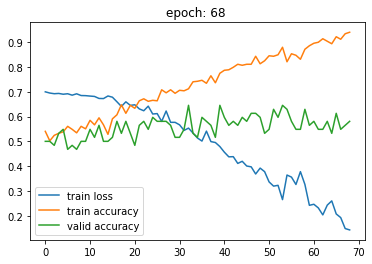

train loss:  0.143162784576416
train accuracy:  0.9395161271095276
valid accuracy:  0.5806451439857483


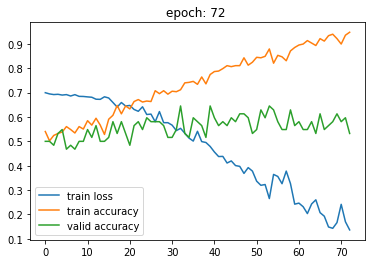

train loss:  0.13658049583435058
train accuracy:  0.9475806355476379
valid accuracy:  0.5322580933570862


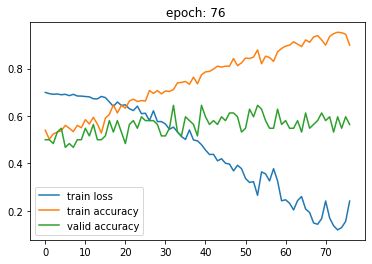

train loss:  0.24106735229492188
train accuracy:  0.899193525314331
valid accuracy:  0.5645161271095276


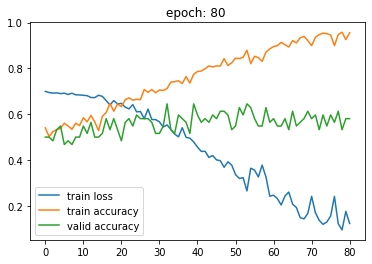

train loss:  0.1230139446258545
train accuracy:  0.9556451439857483
valid accuracy:  0.5806451439857483


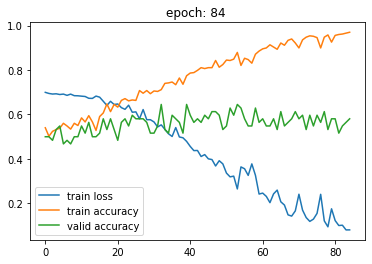

train loss:  0.0811760425567627
train accuracy:  0.9697580933570862
valid accuracy:  0.5806451439857483


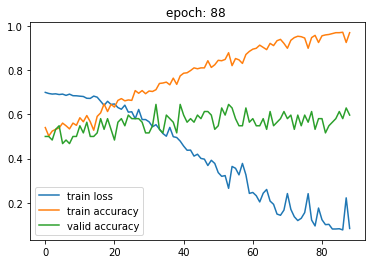

train loss:  0.08353912353515625
train accuracy:  0.9697580933570862
valid accuracy:  0.5967742204666138


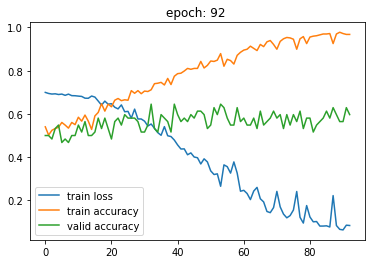

train loss:  0.08374388694763184
train accuracy:  0.9677419066429138
valid accuracy:  0.5967742204666138


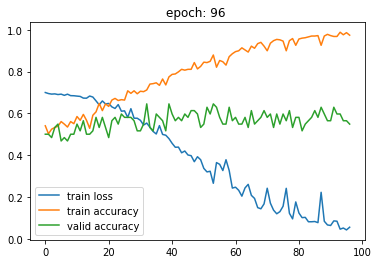

train loss:  0.05499319553375244
train accuracy:  0.9737903475761414
valid accuracy:  0.5483871102333069


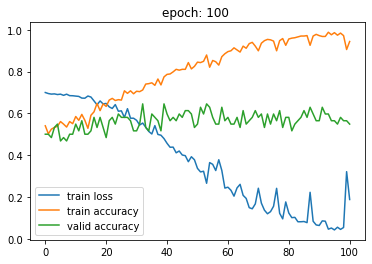

train loss:  0.18759613037109374
train accuracy:  0.9435483813285828
valid accuracy:  0.5483871102333069


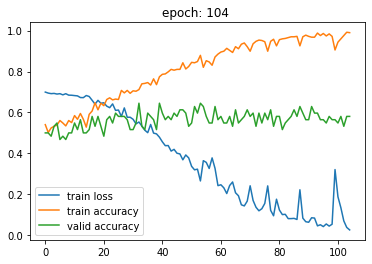

train loss:  0.025891318321228027
train accuracy:  0.9899193644523621
valid accuracy:  0.5806451439857483


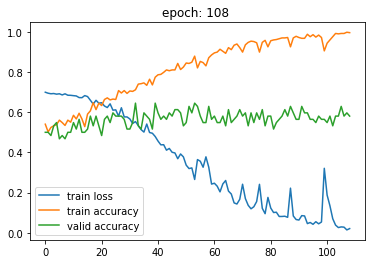

train loss:  0.020815291404724122
train accuracy:  0.9959677457809448
valid accuracy:  0.5806451439857483


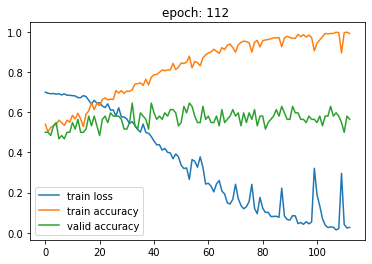

train loss:  0.027020583152770995
train accuracy:  0.9919354915618896
valid accuracy:  0.5645161271095276


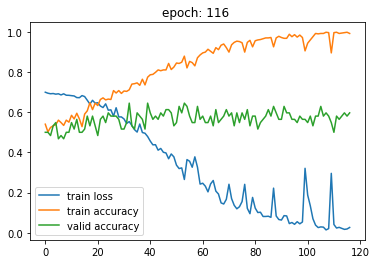

train loss:  0.026390933990478517
train accuracy:  0.9919354915618896
valid accuracy:  0.5967742204666138


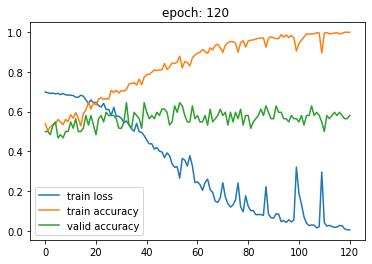

train loss:  0.004191388785839081
train accuracy:  1.0
valid accuracy:  0.5806451439857483


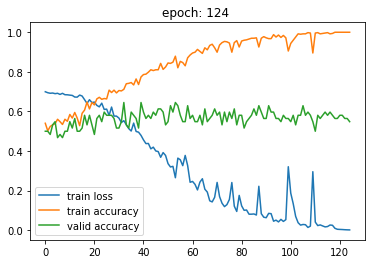

train loss:  0.0016941916942596435
train accuracy:  1.0
valid accuracy:  0.5483871102333069


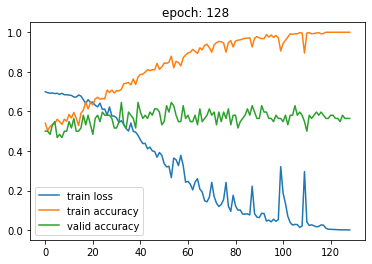

train loss:  0.0012026268988847733
train accuracy:  1.0
valid accuracy:  0.5645161271095276


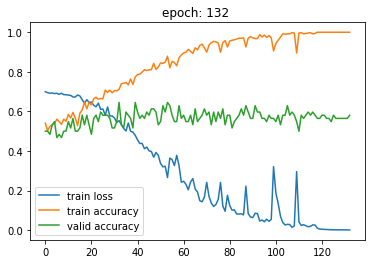

train loss:  0.0008663027733564377
train accuracy:  1.0
valid accuracy:  0.5806451439857483


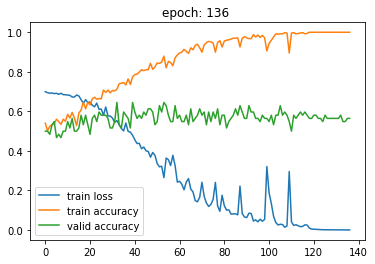

train loss:  0.0007228119671344757
train accuracy:  1.0
valid accuracy:  0.5645161271095276


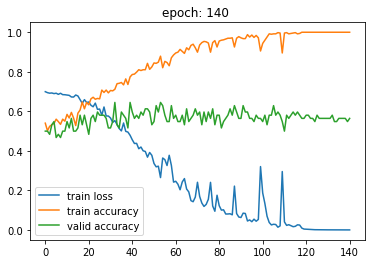

train loss:  0.0006173520162701607
train accuracy:  1.0
valid accuracy:  0.5645161271095276


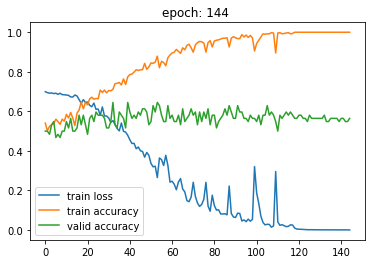

train loss:  0.000522678941488266
train accuracy:  1.0
valid accuracy:  0.5645161271095276


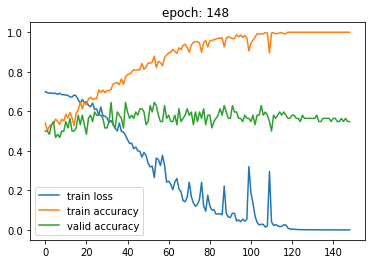

train loss:  0.0004617674648761749
train accuracy:  1.0
valid accuracy:  0.5483871102333069


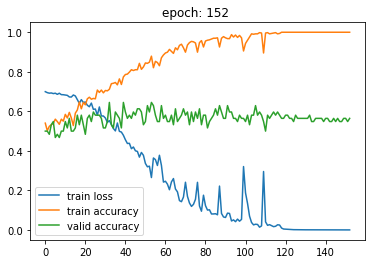

train loss:  0.0004114478826522827
train accuracy:  1.0
valid accuracy:  0.5645161271095276


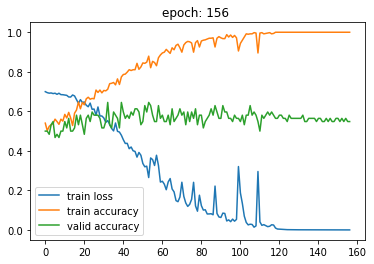

train loss:  0.00038155149668455123
train accuracy:  1.0
valid accuracy:  0.5483871102333069


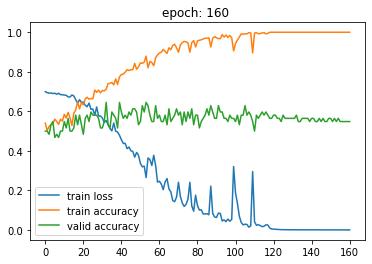

train loss:  0.0003408528491854668
train accuracy:  1.0
valid accuracy:  0.5483871102333069


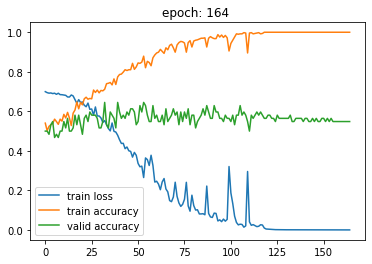

train loss:  0.00030789921060204507
train accuracy:  1.0
valid accuracy:  0.5483871102333069


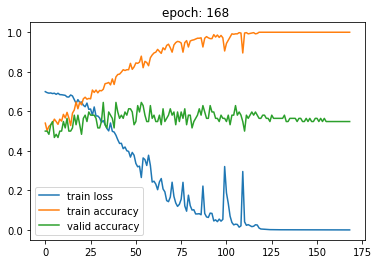

train loss:  0.0002832183986902237
train accuracy:  1.0
valid accuracy:  0.5483871102333069


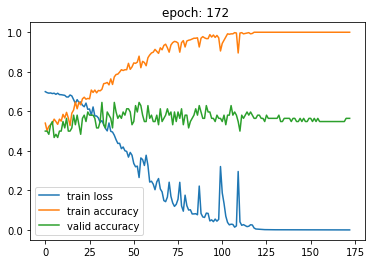

train loss:  0.00026554016396403314
train accuracy:  1.0
valid accuracy:  0.5645161271095276


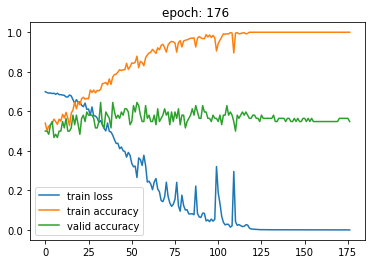

train loss:  0.0002487303502857685
train accuracy:  1.0
valid accuracy:  0.5483871102333069


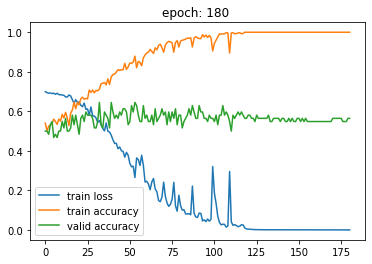

train loss:  0.00023041971027851105
train accuracy:  1.0
valid accuracy:  0.5645161271095276


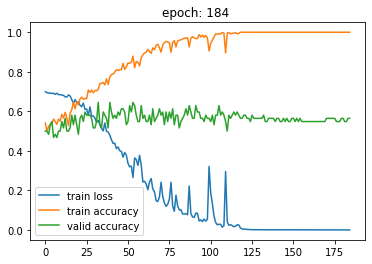

train loss:  0.00021791700273752213
train accuracy:  1.0
valid accuracy:  0.5645161271095276


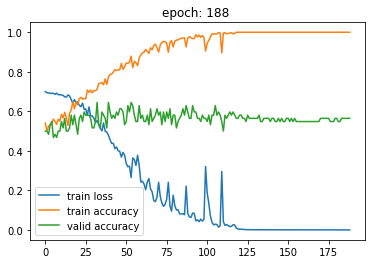

train loss:  0.00020326282829046248
train accuracy:  1.0
valid accuracy:  0.5645161271095276


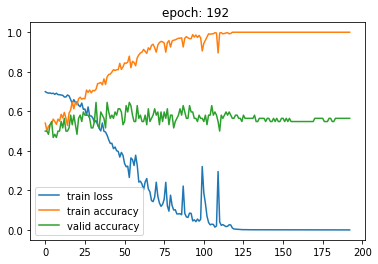

train loss:  0.00019395822659134865
train accuracy:  1.0
valid accuracy:  0.5645161271095276


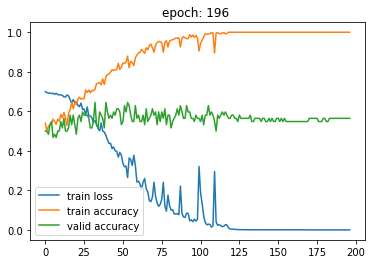

train loss:  0.00018383996561169625
train accuracy:  1.0
valid accuracy:  0.5645161271095276


In [12]:
# training the model
loss_train = np.array([])
accs_train = np.array([])
accs_valid = np.array([])

for epoch in range(num_epochs):
  i=0
  l_epoch = 0
  correct = 0
  for X,y in train_iter:
    i=i+1
    X,y = X.to(device),y.to(device)
    y_hat=net(X)
    #y_hat = net(X.repeat(1,3,1,1)) # pytorch hub model
    correct += (y_hat.argmax(dim=1)==y).sum()
    l=loss(y_hat,y)
    l_epoch+=l
    alg.zero_grad()
    l.backward()
    alg.step()

  loss_train = np.append(loss_train,l_epoch.cpu().detach().numpy()/i)
  accs_train = np.append(accs_train,correct.cpu()/len(trainset))

  correct = 0
  for X,y in valid_iter:
    X,y = X.to(device),y.to(device)
    y_hat = net(X)
    #y_hat = net(X.repeat(1,3,1,1))  # pytorch hub model
    correct += (y_hat.argmax(dim=1)==y).sum()

  #print((y_hat[:4]))
  accs_valid = np.append(accs_valid,correct.cpu()/len(validset))


  if epoch%4 == 0:
    plt.plot(loss_train,label='train loss')
    plt.plot(accs_train,label='train accuracy')
    plt.plot(accs_valid,label='valid accuracy')
    plt.legend(loc='lower left')
    plt.title('epoch: %d '%(epoch))
    plt.pause(.0001)
    plt.show()

    print('train loss: ',loss_train[-1])
    print('train accuracy: ',accs_train[-1])
    print('valid accuracy: ',accs_valid[-1])

## valdiation set results 

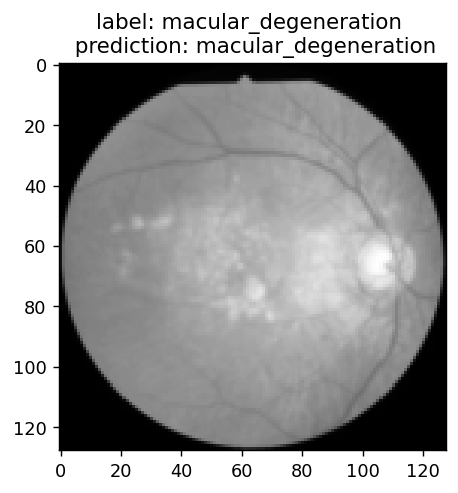

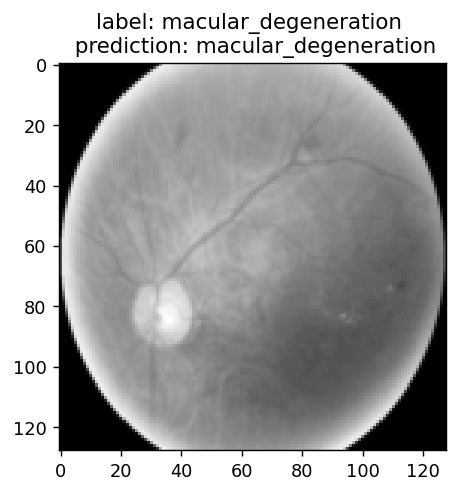

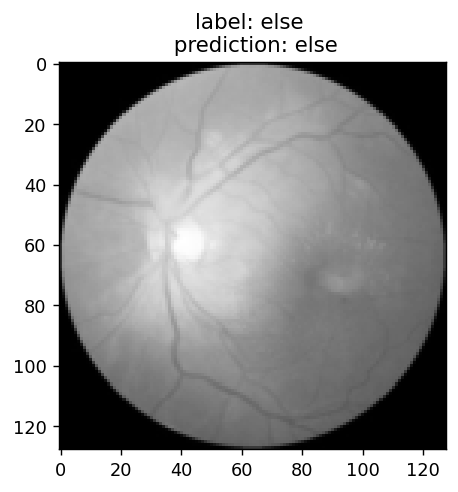

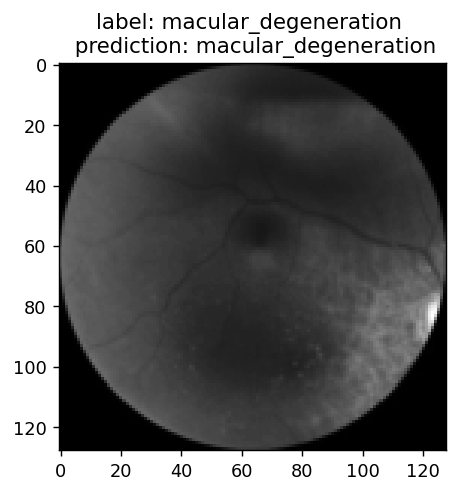

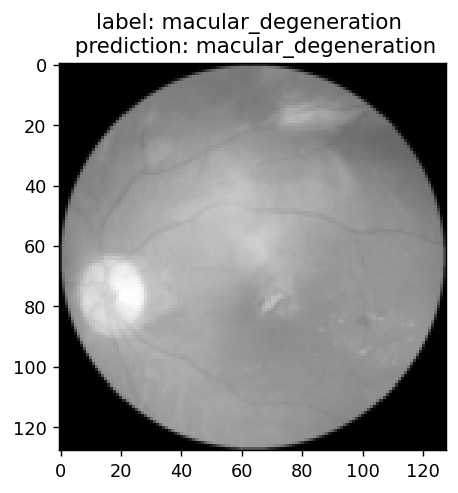

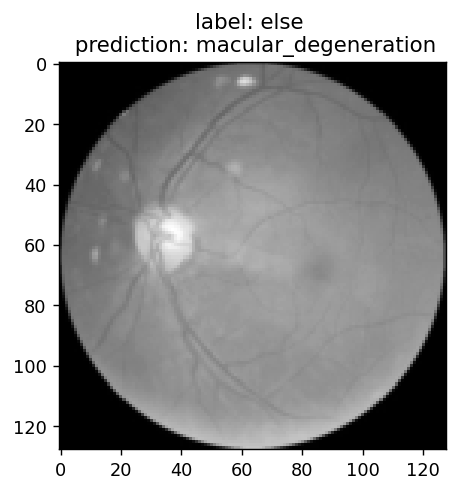

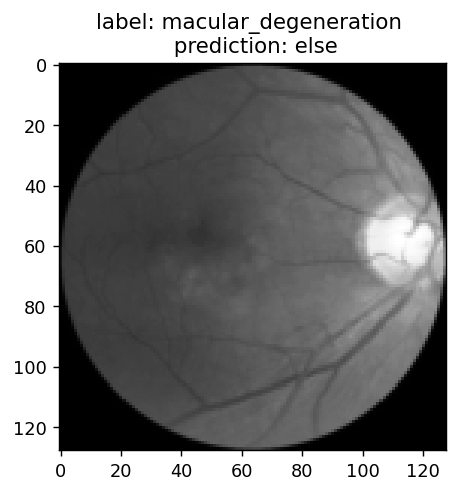

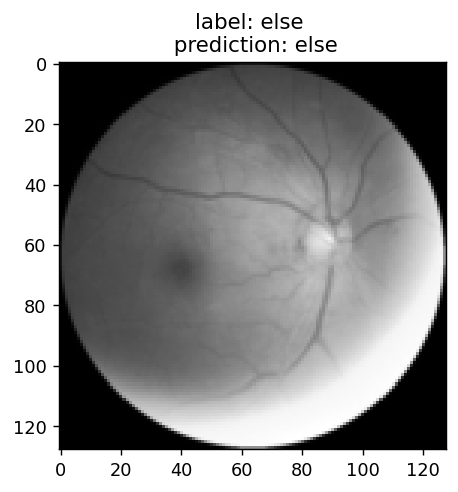

In [13]:
i = 0
for X,y in valid_iter:
  i=i+1
  X=X.to(device)
  y_hat = net(X)    
#  y_hat = net(X.repeat(1,3,1,1))  # pytorch hub model
  y_hat = y_hat.argmax(dim=1)
  for n in range(4):
    plt.figure(dpi=128)
    plt.imshow(X[n].cpu().squeeze(),cmap='gray')
    plt.title('label: %s \n prediction: %s'%(tgtnames[y[n]],tgtnames[y_hat[n]]))
    plt.pause(.0001)
  if i>1:
     break